<a href="https://colab.research.google.com/github/arelies-proximo/ML-Projects/blob/main/Logistic%20Regression%20Project/Logistic_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION

**PERSON WILL BUY SUV, BASED ON AGE AND SALARY**

TARGET = WILL OR NOT BUY
PREDICTOR = AGE AND SALARY

Predictor, non-dependent variables help in Prediction.

Target, "Dependent Variable", depends on the Predictor


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("SocialNetworkAds.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
272,15791373,Male,60,42000,1
259,15815236,Female,45,131000,1
265,15801336,Female,42,108000,1
115,15689237,Male,40,57000,0
177,15594577,Male,25,22000,0
200,15628523,Male,35,39000,0
116,15679297,Male,35,75000,0
107,15789863,Male,27,89000,0
126,15610801,Male,42,65000,0
54,15654901,Female,27,58000,0


In [7]:
X = df.iloc[:, [2,3]].values
  #extracting the Age & Salary column to predictor

In [9]:
X[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [13]:
type(X)

numpy.ndarray

In [19]:
Y = df.iloc[:, 4].values
  #contains the Target
  # 1-yes - Bought Product
  # 0- No - Didn't bought the Product

In [12]:
type(Y)

numpy.ndarray

In [14]:
type(df.iloc[:,4])

pandas.core.series.Series

In [15]:
type(df.iloc[:, [2,3]])

pandas.core.frame.DataFrame

In [16]:
type(df.iloc[:, [2,3]].values)

numpy.ndarray

In [18]:
Y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

**Correaltion**

How columns are related to each other.

1 for Highly Correlated (Every column with itself)

Towards 0 for less correlation.

In [21]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

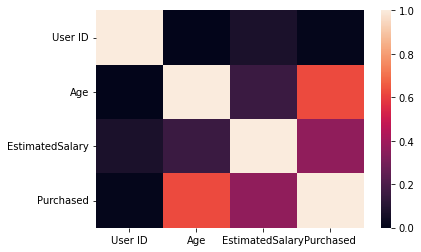

In [20]:
sns.heatmap(df.corr())

*Dark cells => No or Less Correlation*


High correlation between "AGE and PURCHASED" **0.6**


Every element has correlation =1.0 with itself (Cream color)


---



**Splitting the data for Training and Testing**

In [22]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)

In [30]:
x_test

array([[    30,  87000],
       [    38,  50000],
       [    35,  75000],
       [    30,  79000],
       [    35,  50000],
       [    27,  20000],
       [    31,  15000],
       [    36, 144000],
       [    18,  68000],
       [    47,  43000],
       [    30,  49000],
       [    28,  55000],
       [    37,  55000],
       [    39,  77000],
       [    20,  86000],
       [    32, 117000],
       [    37,  77000],
       [    19,  85000],
       [    55, 130000],
       [    35,  22000],
       [    35,  47000],
       [    47, 144000],
       [    41,  51000],
       [    47, 105000],
       [    23,  28000],
       [    49, 141000],
       [    28,  87000],
       [    29,  80000],
       [    37,  62000],
       [    32,  86000],
       [    21,  88000],
       [    37,  79000],
       [    57,  60000],
       [    37,  53000],
       [    24,  58000],
       [    18,  52000],
       [    22,  81000],
       [    34,  43000],
       [    31,  34000],
       [    49,  36000],


**FEATURE SCALING**

Preprocessing the Data

In [31]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

x_train = sc_X.fit_transform(x_train)

x_test = sc_X.fit_transform(x_test)

*Some values may be too large and some too small, high variation in dataset*

This affects the Accuracy by lowering it.

It Normalizes the Values.

In [32]:
x_test

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566],
       [-0.81070599, -1.53554892],
       [-0.45975102, -1.68843113],
       [-0.0210573 ,  2.25592989],
       [-1.60035469, -0.0678797 ],
       [ 0.94406888, -0.83229075],
       [-0.54748976, -0.6488321 ],
       [-0.72296725, -0.46537345],
       [ 0.06668145, -0.46537345],
       [ 0.24215893,  0.20730828],
       [-1.4248772 ,  0.48249625],
       [-0.37201227,  1.43036596],
       [ 0.06668145,  0.20730828],
       [-1.51261594,  0.45191981],
       [ 1.64597884,  1.8278597 ],
       [-0.10879604, -1.47439603],
       [-0.10879604, -0.70998498],
       [ 0.94406888,  2.25592989],
       [ 0.41763642, -0.58767922],
       [ 0.94406888,  1.06344865],
       [-1.16166097, -1.29093738],
       [ 1.11954637,  2.16420057],
       [-0.72296725,  0.5130727 ],
       [-0.63522851,  0.2990376 ],
       [ 0.06668145,

**Training the model**

In [34]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(random_state = 0)

logR.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [35]:
#Testing the Model
#How well it is working, using test dataset
y_pred = logR.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [36]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [38]:
import numpy as np
np.correlate(y_pred, y_test)

array([24])

Training Set Visualization

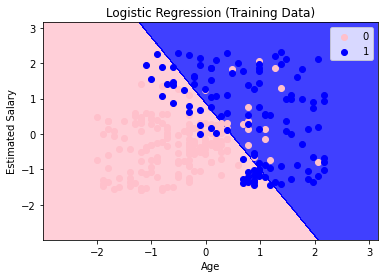

In [42]:
from matplotlib.colors import ListedColormap

x1, x2 = np.meshgrid(np.arange(start = x_train[:,0].min()-1, stop = x_train[:,0].max()+1, step=0.01), 
                     np.arange(start = x_train[:,0].min()-1, stop = x_train[:,0].max()+1, step=0.01))

plt.contourf(x1, x2, logR.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha= 0.75, cmap=ListedColormap(('pink','blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_train)):
  plt.scatter(x_train[y_train==j,0], x_train[y_train == j,1], c=ListedColormap(('pink', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()

plt.show()

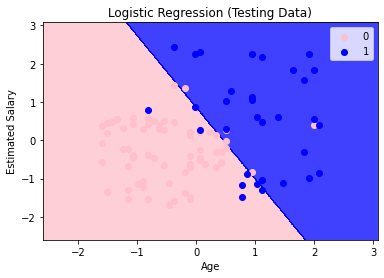

In [43]:
#Visualizing Test Set

x1, x2 = np.meshgrid(np.arange(start = x_test[:,0].min()-1, stop = x_test[:,0].max()+1, step=0.01), 
                     np.arange(start = x_test[:,0].min()-1, stop = x_test[:,0].max()+1, step=0.01))

plt.contourf(x1, x2, logR.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha= 0.75, cmap=ListedColormap(('pink','blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_test)):
  plt.scatter(x_test[y_test==j,0], x_test[y_test == j,1], c=ListedColormap(('pink', 'blue'))(i), label=j)

plt.title('Logistic Regression (Testing Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()

plt.show()

#**CONFUSION MATRIX**

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 8, 24]])

In [46]:
#Observation test dataset
63+5+8+24

100

In [47]:
(63+24)/100*100

87.0

Model Predicts with **87% Accuracy**